In [170]:
import pandas as pd
from pdvega import Axes

In [171]:
lcoe = pd.read_csv("lcoe.csv")
lcoe.year = pd.to_datetime(lcoe.year, format="%Y")
lcoe.head()

,source,subsource,subsubsource,year,lcoe,cost_kw
0,Onshore,Land-Based Wind,NaN,2010-01-01,0.058,2092.00
1,Onshore,Land-Based Wind,Utility,2014-01-01,0.053,1729.00
2,Onshore,Land-Based Wind,Utility,2013-01-01,0.054,1758.00
3,Onshore,Land-Based Wind,NaN,2008-01-01,0.038,1150.09
4,Onshore,Land-Based Wind,NaN,2007-01-01,0.039,1155.73


In [172]:
nonbiogas = lcoe[(lcoe.subsource == "Biopower") & (lcoe.subsubsource != "Biogas")]
lcoe = lcoe[~lcoe.isin(nonbiogas)].copy()
lcoe[lcoe.subsubsource == "Biogas"]

,source,subsource,subsubsource,year,lcoe,cost_kw
645,Biopower,Biopower,Biogas,2008-01-01,0.095,3385.59
646,Biopower,Biopower,Biogas,2007-01-01,0.095,3415.28
647,Biopower,Biopower,Biogas,2006-01-01,0.096,3444.98
648,Biopower,Biopower,Biogas,2001-01-01,0.096,3474.68
649,Biopower,Biopower,Biogas,2002-01-01,0.096,3474.68
650,Biopower,Biopower,Biogas,2003-01-01,0.096,3474.68
651,Biopower,Biopower,Biogas,2004-01-01,0.096,3474.68
652,Biopower,Biopower,Biogas,2005-01-01,0.096,3474.68
653,Biopower,Biopower,Biogas,2000-01-01,0.096,3474.68
654,Biopower,Biopower,Biogas,2009-01-01,0.078,2542.97


In [173]:
lcoe.groupby(["source", "subsource"]).lcoe.mean()

source                  subsource             
Biopower                Biopower                  0.095571
Blind Geothermal        Geothermal                0.089000
Combined Cycle          Combined Cycle            0.045679
Combustion Turbine      Combustion Turbine        0.171189
Distributed Generation  Distributed Generation    0.128400
EGS                     Geothermal                0.102308
Fuel Cell               Fuel Cell                 0.120500
Hydroelectric           Hydroelectric             0.072061
Hydrothermal            Geothermal                0.061432
IGCC                    Coal                      0.091354
Nuclear                 Nuclear                   0.068593
Ocean                   Ocean                     0.235000
Offshore                Wind-Offshore             0.103033
Onshore                 Land-Based Wind           0.065827
Photovoltaic            Photovoltaic              0.353222
Scrubbed                Coal                      0.059655
Small Hyd

In [174]:
a = lcoe.groupby(["subsource", "year"]).agg({"lcoe": "mean", "cost_kw": "mean"}).reset_index()
#a.subsource = a.subsource.str.replace("Wind-Offshore", "wind")
#a.subsource = a.subsource.str.replace("Land-based Wind", "wind")
#a = a.groupby(["subsource", "year"]).agg({"lcoe": "mean", "cost_kw": "mean"}).reset_index()
a = a.rename({"subsource": "source"}, axis=1)
a = a.drop("cost_kw", axis=1)
a.head()

,source,year,lcoe
0,Biopower,2000-01-01,0.096
1,Biopower,2001-01-01,0.096
2,Biopower,2002-01-01,0.096
3,Biopower,2003-01-01,0.096
4,Biopower,2004-01-01,0.096


In [175]:
a.lcoe = a.lcoe * 1000 # MWh
a.head()

,source,year,lcoe
0,Biopower,2000-01-01,96.0
1,Biopower,2001-01-01,96.0
2,Biopower,2002-01-01,96.0
3,Biopower,2003-01-01,96.0
4,Biopower,2004-01-01,96.0


In [176]:
filter = ["Land-Based Wind", "Photovoltaic", "Nuclear", "Biopower", "Coal"]

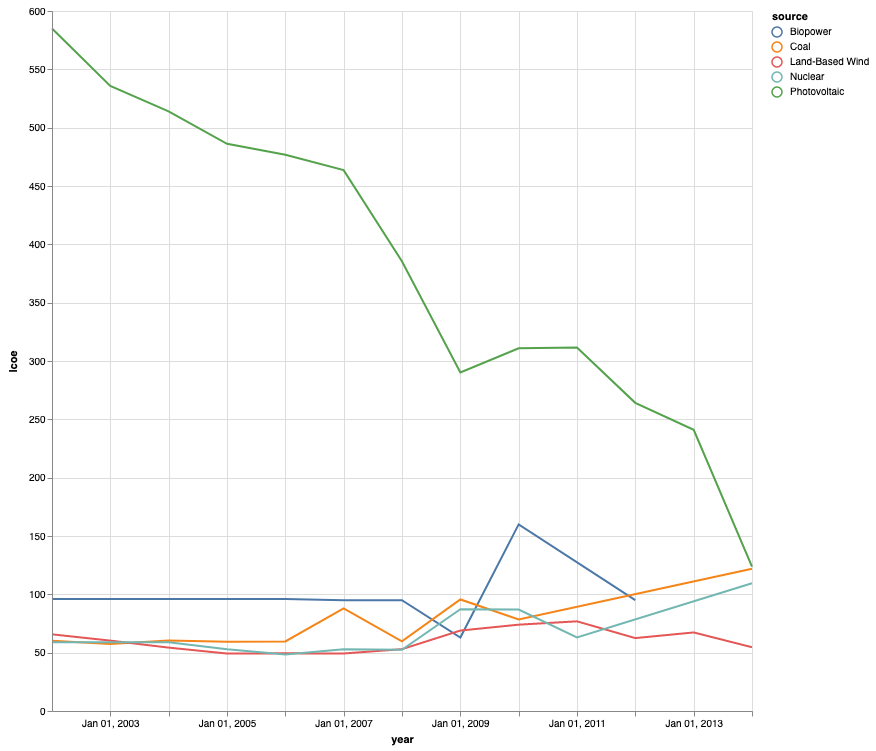

In [177]:
Axes({
    "mark": "line",
    "encoding": {
       "x": {
           "field": "year",
           "type": "temporal"
       },
        "y": {
            "field": "lcoe",
            "type": "quantitative",
        },
        "color": {
            "field": "source"
        },
        "tooltip": {
            "field": "lcoe"
        }
    },
    "height": 700,
    "width": 700
}, a[a.source.isin(filter) & (a.year > "2001-01-01")])

In [178]:
a = a.append({"source": "Photovoltaic", "year": pd.to_datetime("2015-01-01"), "lcoe": "65"}, ignore_index = True)
a = a.append({"source": "Photovoltaic", "year": pd.to_datetime("2016-01-01"), "lcoe": "55"}, ignore_index = True)
a = a.append({"source": "Photovoltaic", "year": pd.to_datetime("2017-01-01"), "lcoe": "50"}, ignore_index = True)
a = a.append({"source": "Land-Based Wind", "year": pd.to_datetime("2015-01-01"), "lcoe": "55"}, ignore_index = True)
a = a.append({"source": "Land-Based Wind", "year": pd.to_datetime("2016-01-01"), "lcoe": "47"}, ignore_index = True)
a = a.append({"source": "Land-Based Wind", "year": pd.to_datetime("2017-01-01"), "lcoe": "45"}, ignore_index = True)
a = a.append({"source": "Nuclear", "year": pd.to_datetime("2015-01-01"), "lcoe": "117"}, ignore_index = True)
a = a.append({"source": "Nuclear", "year": pd.to_datetime("2016-01-01"), "lcoe": "117"}, ignore_index = True)
a = a.append({"source": "Nuclear", "year": pd.to_datetime("2017-01-01"), "lcoe": "148"}, ignore_index = True)
a = a.append({"source": "Biopower", "year": pd.to_datetime("2015-01-01"), "lcoe": "64"}, ignore_index = True)
a = a.append({"source": "Biopower", "year": pd.to_datetime("2016-01-01"), "lcoe": "63"}, ignore_index = True)
a = a.append({"source": "Biopower", "year": pd.to_datetime("2017-01-01"), "lcoe": "60"}, ignore_index = True)
a = a.append({"source": "Coal", "year": pd.to_datetime("2015-01-01"), "lcoe": "108"}, ignore_index = True)
a = a.append({"source": "Coal", "year": pd.to_datetime("2016-01-01"), "lcoe": "102"}, ignore_index = True)
a = a.append({"source": "Coal", "year": pd.to_datetime("2017-01-01"), "lcoe": "102"}, ignore_index = True)

In [179]:
b = a[a.source.isin(filter)].copy()
b.source = b.source.str.replace("Photovoltaic", "solar")
b.source = b.source.str.replace("Land-Based Wind", "wind")
b.source = b.source.str.replace("Nuclear", "nuclear")
b.source = b.source.str.replace("Biopower", "natural gas")
b.source = b.source.str.replace("Coal", "coal")

In [180]:
c = b.copy()
c.lcoe = pd.to_numeric(c.lcoe) / 3.41214 # USD per million BTU

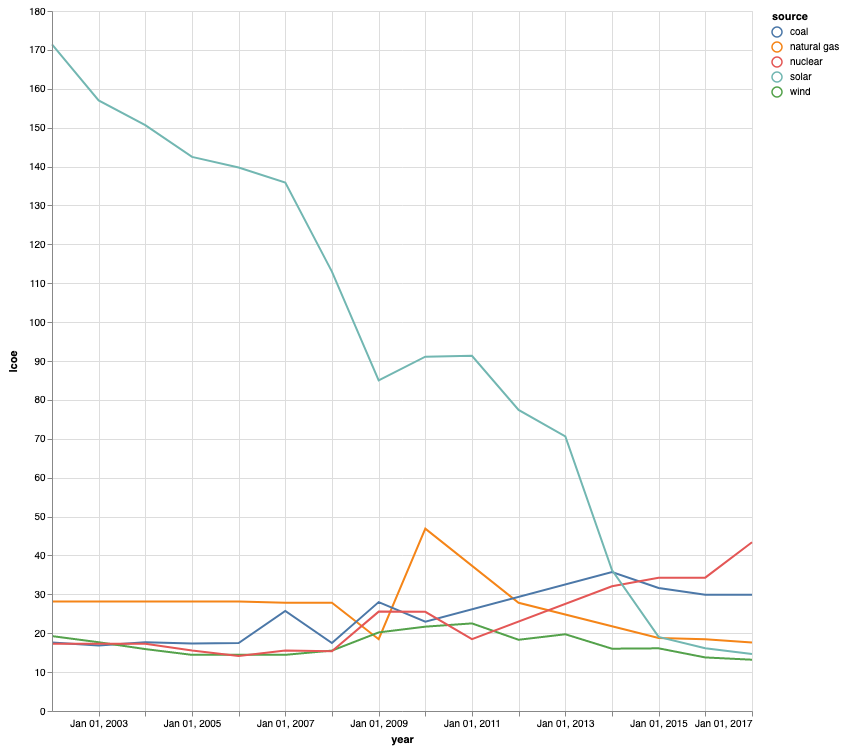

In [181]:
Axes({
    "mark": "line",
    "encoding": {
       "x": {
           "field": "year",
           "type": "temporal"
       },
        "y": {
            "field": "lcoe",
            "type": "quantitative",
        },
        "color": {
            "field": "source"
        },
        "tooltip": {
            "field": "lcoe"
        }
    },
    "height": 700,
    "width": 700
}, c[c.year > "2001-01-01"])

In [182]:
c[c.year > "2001-01-01"].to_csv("../static/data/lcoe.csv", header=True, index=False)